## References
https://machinelearningmastery.com/linear-regression-with-maximum-likelihood-estimation/

In [1]:
import numpy
import pandas
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import pylab 

In [2]:
# load dataset
dataframe = pandas.read_csv("data/navalplantmaintenance.csv", delim_whitespace=True, header=None)

dataframe = dataframe.round(3)

# Assign names to Columns
dataframe.columns = ['lever_position', 'ship_speed', 'gt_shaft', 'gt_rate', 'gg_rate', 'sp_torque', 'pp_torque', 'hpt_temp', 'gt_c_i_temp', 'gt_c_o_temp', 'hpt_pressure', 'gt_c_i_pressure', 'gt_c_o_pressure', 'gt_exhaust_pressure', 'turbine_inj_control', 'fuel_flow', 'gt_c_decay',  'gt_t_decay']

In [3]:
dataframe.head()

,lever_position,ship_speed,gt_shaft,gt_rate,gg_rate,sp_torque,pp_torque,hpt_temp,gt_c_i_temp,gt_c_o_temp,hpt_pressure,gt_c_i_pressure,gt_c_o_pressure,gt_exhaust_pressure,turbine_inj_control,fuel_flow,gt_c_decay,gt_t_decay
0,1.138,3.0,289.964,1349.489,6677.380,7.584,7.584,464.006,288.0,550.563,1.096,0.998,5.947,1.019,7.137,0.082,0.95,0.975
1,2.088,6.0,6960.180,1376.166,6828.469,28.204,28.204,635.401,288.0,581.658,1.331,0.998,7.282,1.019,10.655,0.287,0.95,0.975
2,3.144,9.0,8379.229,1386.757,7111.811,60.358,60.358,606.002,288.0,587.587,1.389,0.998,7.574,1.020,13.086,0.259,0.95,0.975
3,4.161,12.0,14724.395,1547.465,7792.630,113.774,113.774,661.471,288.0,613.851,1.658,0.998,9.007,1.022,18.109,0.358,0.95,0.975
4,5.140,15.0,21636.432,1924.313,8494.777,175.306,175.306,731.494,288.0,645.642,2.078,0.998,11.197,1.026,26.373,0.522,0.95,0.975


In [4]:
dataframe.describe()

,lever_position,ship_speed,gt_shaft,gt_rate,gg_rate,sp_torque,pp_torque,hpt_temp,gt_c_i_temp,gt_c_o_temp,hpt_pressure,gt_c_i_pressure,gt_c_o_pressure,gt_exhaust_pressure,turbine_inj_control,fuel_flow,gt_c_decay,gt_t_decay
count,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.0,11934.000000,11934.000000,1.193400e+04,11934.000000,11934.000000,11934.000000,11934.000000,11934.00000,11934.0000
mean,5.166667,15.000000,27247.498685,2136.289256,8200.947312,227.335768,227.335768,735.495446,288.0,646.215331,2.352963,9.980000e-01,12.297123,1.029474,33.641261,0.662440,0.97500,0.9875
std,2.626388,7.746291,22148.613155,774.083881,1091.315507,200.495889,200.495889,173.680552,0.0,72.675882,1.084770,2.533635e-13,5.337448,0.010390,25.841363,0.507132,0.01472,0.0075
min,1.138000,3.000000,253.547000,1307.675000,6589.002000,5.304000,5.304000,442.364000,288.0,540.442000,1.093000,9.980000e-01,5.828000,1.019000,0.000000,0.068000,0.95000,0.9750
25%,3.144000,9.000000,8375.883750,1386.758000,7058.324000,60.317000,60.317000,589.872750,288.0,578.092250,1.389000,9.980000e-01,7.447250,1.020000,13.677500,0.246000,0.96200,0.9810
50%,5.140000,15.000000,21630.659000,1924.326000,8482.081500,175.268000,175.268000,706.038000,288.0,637.141500,2.083000,9.980000e-01,11.092000,1.026000,25.276500,0.496000,0.97500,0.9875
75%,7.148000,21.000000,39001.426750,2678.079000,9132.606000,332.364750,332.364750,834.066250,288.0,693.924500,2.981000,9.980000e-01,15.658000,1.036000,44.552500,0.882000,0.98800,0.9940
max,9.300000,27.000000,72784.872000,3560.741000,9797.103000,645.249000,645.249000,1115.797000,288.0,789.094000,4.560000,9.980000e-01,23.140000,1.052000,92.556000,1.832000,1.00000,1.0000


In [5]:
#All values is gt_c_i_temp are same, hence no need of a constant feature
dataframe = dataframe.drop('gt_c_i_temp', axis=1)
print(dataframe.isnull().sum() )
#This illustrates, there is no Nan value

lever_position         0
ship_speed             0
gt_shaft               0
gt_rate                0
gg_rate                0
sp_torque              0
pp_torque              0
hpt_temp               0
gt_c_o_temp            0
hpt_pressure           0
gt_c_i_pressure        0
gt_c_o_pressure        0
gt_exhaust_pressure    0
turbine_inj_control    0
fuel_flow              0
gt_c_decay             0
gt_t_decay             0
dtype: int64


In [33]:
X = dataframe.values[:,:15]
Y = dataframe.values[15]
Y2 = dataframe.values[16]
X, Y, Y2

(array([[1.1380000e+00, 3.0000000e+00, 2.8996400e+02, ..., 1.0190000e+00,
         7.1370000e+00, 8.2000000e-02],
        [2.0880000e+00, 6.0000000e+00, 6.9601800e+03, ..., 1.0190000e+00,
         1.0655000e+01, 2.8700000e-01],
        [3.1440000e+00, 9.0000000e+00, 8.3792290e+03, ..., 1.0200000e+00,
         1.3086000e+01, 2.5900000e-01],
        ...,
        [7.1480000e+00, 2.1000000e+01, 3.9003867e+04, ..., 1.0360000e+00,
         4.2104000e+01, 8.3400000e-01],
        [8.2060000e+00, 2.4000000e+01, 5.0992579e+04, ..., 1.0430000e+00,
         5.8064000e+01, 1.1490000e+00],
        [9.3000000e+00, 2.7000000e+01, 7.2775130e+04, ..., 1.0520000e+00,
         8.6067000e+01, 1.7040000e+00]]),
 array([7.1480000e+00, 2.1000000e+01, 3.8981896e+04, 2.6780860e+03,
        9.1329320e+03, 3.3220800e+02, 3.3220800e+02, 8.5370100e+02,
        6.9977900e+02, 2.9630000e+00, 9.9800000e-01, 1.5661000e+01,
        1.0350000e+00, 4.5799000e+01, 9.0700000e-01, 9.5000000e-01,
        9.7600000e-01]),
 arr

In [34]:
#Testing Normality using KS test
for i in dataframe.columns:
    statistic, j = stats.kstest(dataframe[i], "norm")
    if j<=0.05:
        print('Feature: %s is not normal'%i)
    else:
        print('Feature: %s is normal'%i)

Feature: lever_position is not normal
Feature: ship_speed is not normal
Feature: gt_shaft is not normal
Feature: gt_rate is not normal
Feature: gg_rate is not normal
Feature: sp_torque is not normal
Feature: pp_torque is not normal
Feature: hpt_temp is not normal
Feature: gt_c_o_temp is not normal
Feature: hpt_pressure is not normal
Feature: gt_c_i_pressure is not normal
Feature: gt_c_o_pressure is not normal
Feature: gt_exhaust_pressure is not normal
Feature: turbine_inj_control is not normal
Feature: fuel_flow is not normal
Feature: gt_c_decay is not normal
Feature: gt_t_decay is not normal


###### Hence, none of the features from our data follows normal distribution. So we can discard the approach of Linear regression

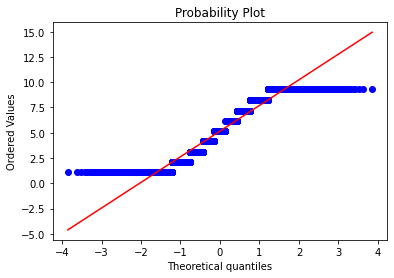

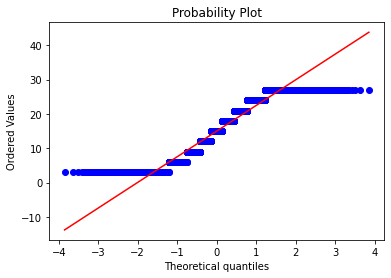

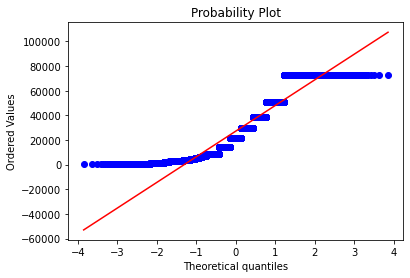

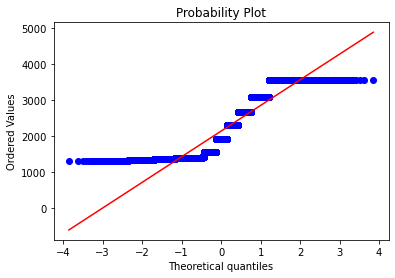

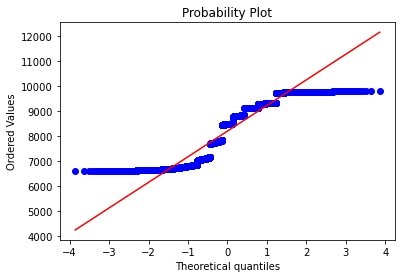

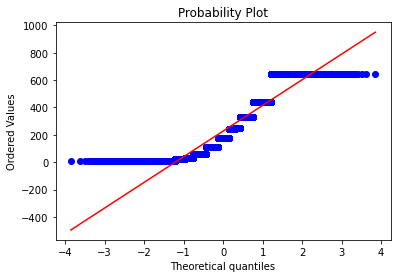

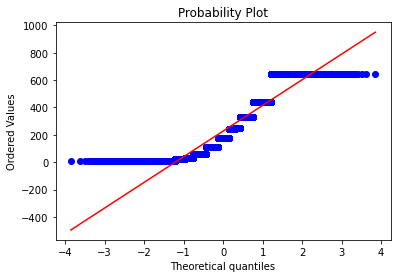

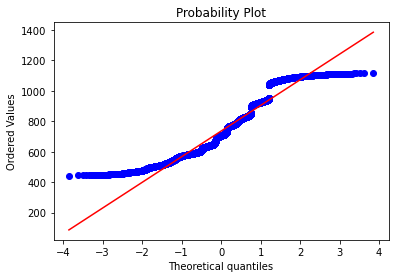

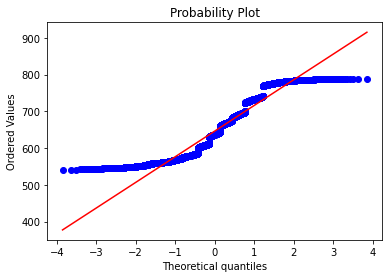

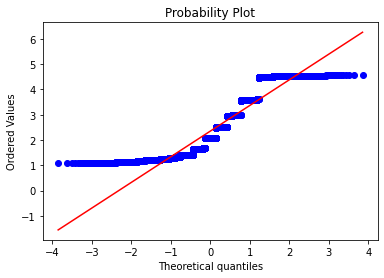

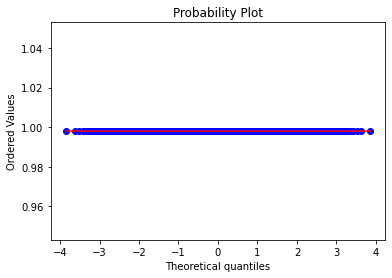

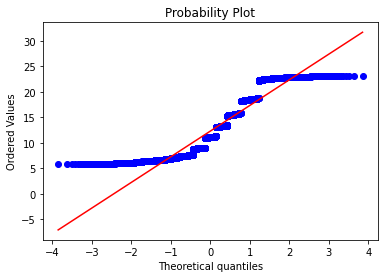

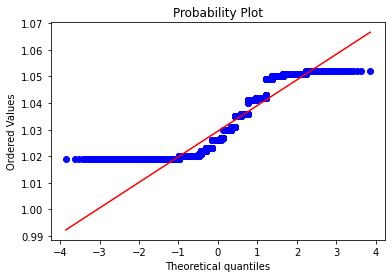

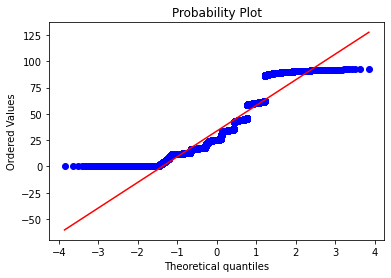

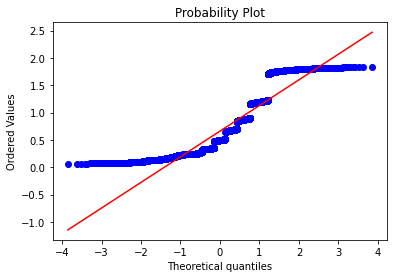

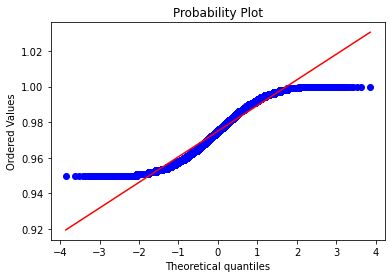

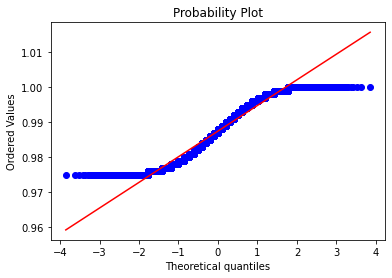

In [21]:
# QQplot helps us graphically represent if our plot follows normal distribution
count = 1
for i in dataframe.columns:
    stats.probplot(dataframe[i], dist="norm", plot=plt)
    plt.show()
# As per the plots none of the graphs start or end on the line, hence our data is not normal/gaussian

In [31]:
# In order to check if our data follows gaussian distribution, we use Andreson-Darling Test
for i in dataframe.columns:
    stat, value, level = stats.anderson(dataframe[i], dist="gumbel")
    print(i, stat)
    stat, value, level = stats.anderson(dataframe[i], dist="expon")
    print(i, stat)
    stat, value, level = stats.anderson(dataframe[i], dist="logistic")
    print(i, stat)

lever_position 261.2225388871484
lever_position 1141.5993290456172
lever_position 219.40325130583187
ship_speed 262.6548312486502
ship_speed 1089.9698423562331
ship_speed 225.46472040724802
gt_shaft 671.9241745810577
gt_shaft 142.75948368143145
gt_shaft 379.41089663159437
gt_rate 694.9457900495036
gt_rate 2402.44038691855
gt_rate 594.6551342944131
gg_rate 379.18770287727966
gg_rate 4134.478749003512
gg_rate 451.96400175818417
sp_torque 707.266877442582
sp_torque 190.79353477940276
sp_torque 399.04099527407743
pp_torque 707.266877442582
pp_torque 190.79353477940276
pp_torque 399.04099527407743
hpt_temp 441.70463791561633
hpt_temp 3261.634379277306
hpt_temp 189.96569448114315
gt_c_o_temp 398.4565430071052
gt_c_o_temp 4341.627275558494
gt_c_o_temp 263.1200173394791
hpt_pressure 657.164007680527
hpt_pressure 1739.4328747477666
hpt_pressure 434.4731983722377
gt_c_i_pressure inf
gt_c_i_pressure 5473.829185050701
gt_c_i_pressure 7476.698898384697
gt_c_o_pressure 585.0846110306029
gt_c_o_press

#### Feature Selection

In [ ]:
model = ExtraTreesRegressor()
rfe = RFE(model, 3)
fit = rfe.fit(X, Y)